<p> <b> <h1> Chapter 5 - Statistics</h1> </b> </p>
<p> Statistics are a field of knoledge that deservers a hole room in a library instead of a single chapter, but we are going to se the basics to understand in Data Science.</p>
<p> We saw how to produce and visualize data, but now, we are going to describe them.</p>
<p> <b>Describing a set of data </b> </p>

In [28]:
import random
from matplotlib import pyplot as plt
from collections import Counter
from numpy import dot
num_friends = [random.randint(0,100) for i in range(204)]
daily_minutes = [random.randint(10,200) for i in range(204)]
user=list(zip(num_friends,daily_minutes))

In [3]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]

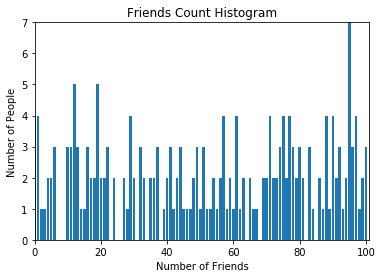

In [4]:
plt.bar(xs, ys)
plt.axis([0,101,0,7])
plt.title("Friends Count Histogram")
plt.xlabel("Number of Friends")
plt.ylabel("Number of People")
plt.show()

In [5]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [6]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_vallue = sorted_values[1]
second_largest_value = sorted_values[-2]

<p> <b> Central Tendency</b> </p>
<p> Generally, we want to know where our data is centred. We commonly look for the mean value.</p>

In [11]:
def mean(x):
    return(sum(x)/len(x))
mean(num_friends)

52.15686274509804

<p> Sometimes we can calculate the median, the median value is the value that separates the higher half and the lower half of data. If the set of data has a odd number of values, it is the value that is in the middle; if the set of data has a even number of values, it is the average of the middle values. </p>

In [10]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    
    if n % 2 ==1:
        #if the number is odd
        return sorted_v[midpoint]
    else:
        #iff the number is even
        lo = midpoint -1
        hi = midpoint
        return (sorted_v[lo]+sorted_v[hi])/2
    
median(num_friends)

54.0

<p> When we want to know the value that is higher than P percaint of the set of data, we can use quantile.</p> 

In [12]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.1) #the number of friends that is higher than 10% of the entire netwoork

11

In [13]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]
mode(num_friends)

[95]

<p> <b> Dispersion</b></p>
<p> Dispersion is the mensuration of how much the set differ.<p>

In [14]:
#the amplitude
def data_range(x):
    return max(x)-min(x)
data_range(num_friends)

100

In [32]:
def de_mean(x):
    x_bar = mean(x)
    return[x_i - x_bar for x_i in x]
#the variance
def variance(x):
    x_mean = mean(x)
    deviation = de_mean(x)
    sum_of_squares = sum([x_i**2 for x_i in deviation])
    n = len(x)
    return (sum_of_squares/(n-1))
variance(num_friends)

904.3398773302428

In [35]:
import math
#the standart deviation
def standard_deviation(x):
    return math.sqrt(variance(x))
standart_deviation(num_friends)

30.072244301519014

<p><b> Covariance and Correlation</b></p>
<p> Variance and standart deviation work for one-dimensional variable sets of data. Covariance is the measurement of how two variables relate to each other. </p>
<p> Having a big and positive covariance between variable X and Y means that if you increase Y, X will be notably increased as well. On the other side a negative covariance between X and Y means that if you increase Y, you will notice a decrease on X.</p>

In [34]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)
#remember that the function dot do the product between the correspondent pairs and then sum
covariance(num_friends, daily_minutes)

158.28897421037382

<p> Sometimes, it is a little hard to tell or define exactly what a big covariance means. In this case, the covariance is minute-friends per day and is a little hard to understand the meaning of minute-friends per day. If every user had twice friends as much (preserving the minutes) it would result in a covariance twice as big, but it is just inter-related variables.</p>
<p> For those reasons, it is much more common to consider correlation, that divides the standard deviations of two variables.</p>

In [38]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    try:
        return covariance(x,y) / (stdev_x*stdev_y)
    except ZeroDivision:
        return 0 #if there is no amplitude, the correlation is 0
correlation(num_friends, daily_minutes)
#since it is generated from random numbers, this is a week correlation

0.09512658650755684

Correlation is a free unit variable and always stays between -1 (perfect anticorrelation) and 1 (perfect correlation).